<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/Day_2_Data_Analysis_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise:1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

**Extraction of  Data**

Centre for Systems Science and Engineering, Johns Hopkins University
 is providing a github repository with all recent data: https://github.com/CSSEGISandData/COVID-19.git

In [8]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-23-2020.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3263 non-null   float64
 1   Admin2               3268 non-null   object 
 2   Province_State       3805 non-null   object 
 3   Country_Region       3975 non-null   object 
 4   Last_Update          3975 non-null   object 
 5   Lat                  3890 non-null   float64
 6   Long_                3890 non-null   float64
 7   Confirmed            3975 non-null   int64  
 8   Deaths               3975 non-null   int64  
 9   Recovered            3975 non-null   int64  
 10  Active               3973 non-null   float64
 11  Combined_Key         3975 non-null   object 
 12  Incident_Rate        3890 non-null   float64
 13  Case_Fatality_Ratio  3933 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 434.9+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-24 05:27:31,33.93911,67.709953,44988,1695,35976,7317.0,Afghanistan,115.566189,3.767671
1,NaN,NaN,NaN,Albania,2020-11-24 05:27:31,41.15330,20.168300,33556,716,16230,16610.0,Albania,1166.029606,2.133747
2,NaN,NaN,NaN,Algeria,2020-11-24 05:27:31,28.03390,1.659600,75867,2294,49421,24152.0,Algeria,173.010708,3.023713
3,NaN,NaN,NaN,Andorra,2020-11-24 05:27:31,42.50630,1.521800,6304,76,5405,823.0,Andorra,8158.933540,1.205584
4,NaN,NaN,NaN,Angola,2020-11-24 05:27:31,-11.20270,17.873900,14634,337,7351,6946.0,Angola,44.525895,2.302856


Data Preprocessing 

In [9]:
df.drop(['FIPS', 'Admin2','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,2020-11-24 05:27:31,33.93911,67.709953,44988,1695,35976,7317.0,115.566189,3.767671
1,Albania,2020-11-24 05:27:31,41.15330,20.168300,33556,716,16230,16610.0,1166.029606,2.133747
2,Algeria,2020-11-24 05:27:31,28.03390,1.659600,75867,2294,49421,24152.0,173.010708,3.023713
3,Andorra,2020-11-24 05:27:31,42.50630,1.521800,6304,76,5405,823.0,8158.933540,1.205584
4,Angola,2020-11-24 05:27:31,-11.20270,17.873900,14634,337,7351,6946.0,44.525895,2.302856


In [10]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,44988,7317.0,35976,1695
1,Albania,33556,16610.0,16230,716
2,Algeria,75867,24152.0,49421,2294
3,Andorra,6304,823.0,5405,76
4,Angola,14634,6946.0,7351,337


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



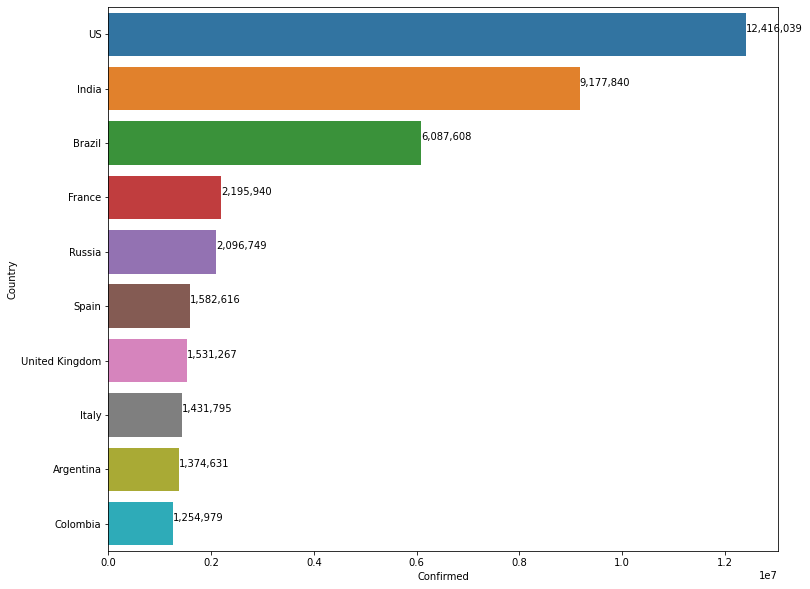

In [14]:
### Find top 20 countries with maximum number of confirmed cases
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(10)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_10['Confirmed'], top_10['Country'])
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [ ]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



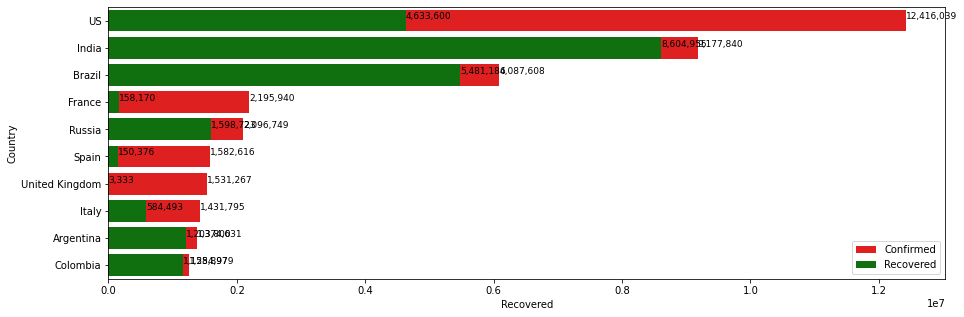

In [16]:
top_10 = world.sort_values(by=['Confirmed'], ascending=False).head(10)
### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_10['Confirmed'], top_10['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_10['Recovered'], top_10['Country'], color = 'green', label='Recovered')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_10['Confirmed'],top_10['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_10['Recovered'],top_10['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

Excercise:2

In [17]:
url = 'https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv'
full_table = pd.read_csv(url, 
                         parse_dates=['Date'])
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [18]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']



# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

In [19]:
data = full_table.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
data = data.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
data.head()

fig = px.area(data, x="Date", y="Count", color='Case',
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig #.write_image('covid-eda-2-1.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
data1= full_table.groupby('Date').sum().reset_index()

# adding two more columns
data1['No. of Deaths to 100 Confirmed Cases'] = round(data1['Deaths']/data1['Confirmed'], 3)*100
data1['No. of Recovered to 100 Confirmed Cases'] = round(data1['Recovered']/data1['Confirmed'], 3)*100


data1= data1.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(data1, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time',
              color_discrete_sequence=[dth, rec])
fig.update_layout(legend=dict(orientation="h", y=1, x=0, 
                              xanchor="left", yanchor="top"),
                  margin=dict(t=80,l=0,r=0,b=0))
fig